<a href="https://colab.research.google.com/github/AJ-4-beep/MAT-421/blob/main/MAT421FinalProjectAjaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

Studying homicide rates in the US is an interesting and convoluted subject that can span economic, social, racial, and state lines. However, when considered holistically, murder rates have significantly decreased in from decades past.

However, that still does not answer a fundamental question regarding homicide rates in the US; can we predict them using mathematical methods?

Despite the complexity involved in how homicide increases and decreases, can math be used to produce an estimation, or to ascertain a trend from the rates themselves, that can be used to produce homicide rates in the future, for use in data analysis?

This is an important question to answer because creating future analysis on homicide rates can be made years or even decades in advance, without needing extensive knowledge on what causes homicide rates to change, and without needing to wait for real values for homicide rates to be published.

In this project specifically, I will take a dataset of multiple different kinds of US crime rates from 1960 to 2014, and will predict what the murder rate (and amount of gross murders) should be for 2015 and 2024, and compare against the actual rates for those years. As both of these years lie outside of the year range in the dataset, I will essentially be testing whether mathematical models can be used to predict future homicide rates based on presently available data.

Analysis of homicide rates has been performed before, such as in this article:https://www.macrotrends.net/global-metrics/countries/usa/united-states/murder-homicide-rate . Their analysis is useful in determining the actual rates and real determined values for homicide rates, but does not do much in the way of predicting future rates that are currently unknown. This, as an example of the greater analysis regarding homicide rates, reveals a current need for additional methods to be introduced to actually attempt to calculate rates looking into the future, rather than only focusing on current rates. Generally, i will use a tolerance value of .10 (10 percent) for tests done in this project.


**MATH METHOD**

The 2 math methods I chose to use for this project are interpolation and regression.

Interpolation is a mathematical method that can be used to estimate unknown data by using existing data, to create a series of lines or curves that formulates an overall graph. This graph, connecting the known data points, can then be used to estimate the unknown data points.

Essentially, graphically, it takes data points, and connects them. Then, if there are unknown values in between those data points, they can be estimated by the connections made between known data points.

Mathematically speaking, interpolation creates an "estimation function" for the data, such that, given a set of data points (xi, yi), with i being the set [1, ..., n], an estimation function y(x) can be created that satisfies y(xi) = yi for every data point.

Interpolation, while useful, is not particularly suited to predicting new values as it only considers individual connections between 2 points. So, while it is effective for estimating points within the data range, it is not so effective for predicting values outside of the range.

Specific to this project, I will use linear interpolation, which connects points with lines rather than curves, in order to ascertain the linearity of the entire data range. This is important to ascertain as determining the linearity of the data set can help determine whether or not regression (specifically linear regression) will be effective and accurate.

However, interpolation between years will only be sufficient to estimate the unknown data in the months between years. To determine the linearity of the entire dataset, i.e. linearity from a beginning year to an ending year, rather than performing an interpolation between all years, the method used here will be to perform an interpolation between the endpoints of the chosen dataset. Then, utilizing the midpoint of that interpolation, and comparing it to the actual midpoint of the data range will help determine whether this data range is roughly linear.



The second method used is regression, and specifically, least squares linear regression.

Linear Regression is a mathematical method that is used to estimate a line that, given an x input, will return a y input close to the actual y value shown in data. Specifically, least squares linear regression works by drawing a line, and minimizing the squared difference between points estimated on the line and the actual y outputs on the graph, to an overall minimal error value for those squared differences.

Essentially, least squares linear regression estimates a line that has extremely small differences between all data points within a data range, that estimates the trend shown by those data points.

Thus, it can be used more effectively to predict future values, as it estimates the entire trend shown by the data.


Therefore, I will use the interpolation to estimate the linearity of the data range, and then use regression based on whether or not the dataset is linear enough.


**DATA**

The dataset used is sourced from https://www.kaggle.com/datasets/mahmoudshogaa/us-crime-rates-1960-2014/data . It describes, from 1940 to 2014, US crime rates in terms of gross amount. For example, for a year entry, it displays the total population for that year, and then the gross amount of different crimes for that year, such as Murder, Burglary, and Vehicle Theft.

**IMPLEMENTATION**

The basic implementation is to import the dataset, load in the necessary libraries, filter the data, conduct the interpolation, conduct the regression, calculate the estimated values based on the regression, and compare against actual values to ascertain accuracy. The full code will be included at the end of the project.

The first step is to import the dataset and load in necessary libraries:

In [36]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


#load in crime rate dataset from Github raw url
url = 'https://raw.githubusercontent.com/AJ-4-beep/MAT-421/refs/heads/main/US_Crime_Rates_1960_2014.csv'
df = pd.read_csv(url)


The next step is to filter. Here, the only necessary columns for analyzing murder rates will be the Year column, denoting the year, the Population column, denoting the total population in the US for that year, and the Murder column, denoting the gross amount of murders for that year.

Additionally, the data is truncated to only include data from 1980 to the end of the dataset (2014). This is done to reduce error due to technological advancement; prior to this period, records of homicide rates may not have been recorded through technological means, perhaps introducing statistical bias due to faulty reporting methods.

Finally, a murder rate column is produced, that describes the total murders over the population for each year:

In [37]:
# only  keep necessary columns
df = df[['Year', 'Population', 'Murder']]

# filter to only include years after 1979
df = df[df['Year'] >= 1980]

# create murder rate column by dividing gross murder by population (for year)
df['Murder_Rate'] = df['Murder'] / df['Population']

The next step is to conduct the interpolation. Firstly, only the endpoints of the now filtered  murder rates are taken into consideration. This means only the murder rates for 1980 and 2014 are used. Then, a linear interpolation is drawn between them:

In [38]:
# Interpolation to ascertain linearity of data

# take only endpoints of 1980 and 2014
df_endpoints = df[(df['Year'] == 1980) | (df['Year'] == 2014)]


# linear interpolate between endpoints
interp_func = interp1d(df_endpoints['Year'], df_endpoints['Murder_Rate'], kind='linear')

Next, I use the midpoint of this line to test against the actual midpoint murder rate. Based on how close this is to the actual midpoint murder rate, that will determine whether or not this data range can effectively be estimated by a line.

In [39]:
#fidn midpoint year (1997) and compare against calculated interpolation value
# for 1997
mid_year = (1980 + 2014) // 2  #1997
estimated_murder_rate = interp_func(mid_year) #lininterp at 1997
actual_murder_rate = df[df['Year'] == mid_year]['Murder_Rate'].values[0]
#get actual murder rate for the year matching to midyear (1997)

The midpoint year is 1997, and the interpolation's estimate for the 1997 murder rate is produced. Additionally, the dataset's actual value for the 1997 murder rate is retrieved, to be compared against the estimated rate:

In [40]:
# calc simple error percent for actual and estimated
interp_error_percentage = abs(estimated_murder_rate - actual_murder_rate) / actual_murder_rate * 100

print(f"Estimated Murder Rate for {mid_year} (via endpoint interpolation): {estimated_murder_rate:.8f}")
print(f"Actual Murder Rate for {mid_year}: {actual_murder_rate:.8f}")
print(f"Absolute Error: {abs(estimated_murder_rate - actual_murder_rate):.8f}")
print(f"Error Percentage: {interp_error_percentage:.4f}%")

Estimated Murder Rate for 1997 (via endpoint interpolation): 0.00007346
Actual Murder Rate for 1997: 0.00006803
Absolute Error: 0.00000543
Error Percentage: 7.9845%


The error between the estimated 1997 murder rate and the actual 1997 murder rate is approximately 7.98 percent. With a common error tolerance of 0.10 (or 10 percent) this still falls within tolerance, so the data range from 1980 to 2014 can be considered relatively linear. Thus, the next step is to perform the least squares linear regression. The first step is to assign the x and y values for the regression:

In [41]:
# linear regression

# create x and y for regression
x = df['Year'].values
y = df['Murder_Rate'].values

Next, the linear regression is performed, and the slope and intercept for this linear regression trendline are produced:

In [43]:
# fit x and y to line, find slope and intercept of regression line
coeffs = np.polyfit(x, y, 1)
slope, intercept = coeffs

print(f"\nRegression Line: Murder_Rate = {slope:.8e} * Year + {intercept:.8f}")



Regression Line: Murder_Rate = -1.64283171e-06 * Year + 0.00335135


Now, with the regression line's slope and intercept produced, estimates for 2015 and 2024 can be produced. For the first estimation, the equation-calculated result for 2015 is compared against the actual calculated murder rate in 2015. Values used to calcuated the actual murder rate for 2015 and 2024 are sourced from external sources detailing in the REFERENCES section.

Then, a similar analysis is carried out for the 2024 estimates, to show further whether this regression line is truly accurate.

In [44]:
#calc predicted murder rate for 2015
year_predict = 2015
murder_rate_2015_predicted = slope * year_predict + intercept

print(f"\nPredicted Murder Rate for 2015: {murder_rate_2015_predicted:.8f}")

# Real 2015 data sourced from sources (detailed in project)
real_2015_murders = 15696
real_2015_population = 320090857
real_2015_murder_rate = real_2015_murders / real_2015_population


# calc simple error percent for actual and estimated murder rate
regression_error_percentage = abs(murder_rate_2015_predicted - real_2015_murder_rate) / real_2015_murder_rate * 100


#calc estimtaed gross murders in 2015
predicted_murders_2015 = murder_rate_2015_predicted * real_2015_population

#difference between gross estimated and actual murders to see
#how many "excess" or "lack thereof" of murders in 2015
murder_difference = predicted_murders_2015 - real_2015_murders

#the same calc for gross difference in murders, butfor 2024
year_predict_2024 = 2024
murder_rate_2024_predicted = slope * year_predict_2024 + intercept
predicted_murders_2024 = murder_rate_2024_predicted * 340100000
real_2024_murders = 24849

#gross diff in 2024 estimated and actual murders
murder_difference_2024 = predicted_murders_2024 - real_2024_murders



print(f"Actual Murder Rate for 2015: {real_2015_murder_rate:.8f}")
print(f"Absolute Error for 2015 Prediction (Rate): {abs(murder_rate_2015_predicted - real_2015_murder_rate):.8f}")
print(f"Error Percentage for 2015 Prediction (Rate): {regression_error_percentage:.4f}%")

print(f"\nPredicted Total Murders in 2015: {predicted_murders_2015:.2f}")
print(f"Actual Total Murders in 2015: {real_2015_murders}")
print(f"Difference in Number of Murders: {murder_difference:.2f}")

print(f"\nPredicted Total Murders in 2024: {predicted_murders_2024:.2f}")
print(f"Actual Total Murders in 2024: {real_2024_murders}")
print(f"Difference in Number of Murders (2024): {murder_difference_2024:.2f}")


Predicted Murder Rate for 2015: 0.00004104
Actual Murder Rate for 2015: 0.00004904
Absolute Error for 2015 Prediction (Rate): 0.00000800
Error Percentage for 2015 Prediction (Rate): 16.3045%

Predicted Total Murders in 2015: 13136.85
Actual Total Murders in 2015: 15696
Difference in Number of Murders: -2559.15

Predicted Total Murders in 2024: 8929.50
Actual Total Murders in 2024: 24849
Difference in Number of Murders (2024): -15919.50


As calculated, the error between the actual and calculated value for the murder rate in 2015 is 16.30 percent. This is above 10 percent, meaning that the regression line has essentially failed to predict a value outside of its data range (recall the data only extends to 2014).

This is reflected in the gross number of murders; the actual number for 2015 is 15696, and the calculated value is 13136.85. This means that there is an underestimate of about 2559 murders for 2015.

This error only becomes more prominent with the 2024 estimation; the estimated amount of murders is 8929.50, and the actual number is 24849, creating an underestimate of 15919 murders, more than half of the actual number of murders.

Clearly, the regression line has failed to estimate both years directly after its data range, as well as those further down the line. So, to better analyze the regression line in context of the existing data, a graph of murder rates by year, with the regression line plotted on top, is displayed:

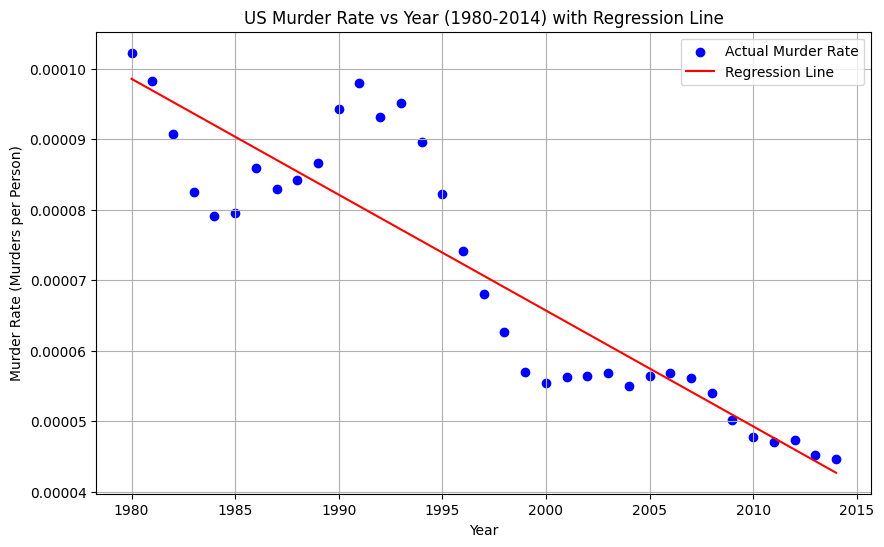

In [45]:
#plot with regression line

plt.figure(figsize=(10,6))
plt.scatter(df['Year'], df['Murder_Rate'], color='blue', label='Actual Murder Rate')
plt.plot(x, slope*x + intercept, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Murder Rate (Murders per Person)')
plt.title('US Murder Rate vs Year (1980-2014) with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

Evidently, the regression line is generally accurate to the whole data range, which is expected, given that the interpolation shows the data as generally linear.

However, despite the entire range being roughly linear, there are clear patterns in the data that are non-linear, such as the hump around 1990, or the sudden shift around year 2000.

As can be seen, murder rates post 2000 appear to take on a very different trend as does the rest of the data range. This could be due to a number of different factors, but most probably is due to political shifts in governance, legal shifts in the definition of murder, and sociological/economical shifts in behavior/economic class.

Regardless of the cause, though, clearly, analyzing the data range from 2000 onwards may provide a more salient reflection of actual murder rates for future years in the 2000s.

**Results, Conclusion, and Comparisons**

Overall, the results presented show that a different data range would likely be more effective in predicting future homicide rates in the 2000s.

For the interpolation midpoint comparison, an error of about 8 percent is found, which, while still under tolerance of 10 percent, is quite close to crossing the tolerance value. Based on the behavior of the graph post 2000s, selecting the data range of 2000 to 2014 may provide a more linear graph that, when subjected to a similar interpolation test, may produce a lower midpoint comparison error.

Then, for the comparison between the baseline actual and calculated murder rates for 2015, the error is 16.3 percent, crossing the tolerance of 10 percent. The gross number of murders for that year is underestimated by about 2500 persons, and for 2024, that underestimate is about 16,000 persons. This is significant as the dataset's estimates for gross murders in the 2000s hover around 15000; that means the calculated error from this regression line is almost equal to the actual amount of murders that occur in any 20XX year prior to 2015.

If this regression line was taken to be true, that would mean that the gross amount of murders in 2024 would be almost double what it actually was.


In conclusion, this means that the regresion line is inaccurate. Despite the interpolation showing general linearity, the regression still did not reflect the finer trends that appear roughly every decade. From the 80s to the 90s, a concave up shape is displayed, from the 90s to the 2000s, a linear trend is shown going downward, and from the 2000s onwards, the murder rate has generally stagnated, though it does still appear to be decreasing.

What this means is that, in future analysis, it will likely be better to analyze solely the portion after the 2000s to ascertain future murder rates in the 2000s.

Comparison against other analyses is difficult as similar analyses are rare, however, comparing against real baseline data clearly shows that there is more work to be done with this statistical exercise. First and foremost would be choosing a more reflective section of the data, and there are a few secondary improvements, such as picking a more verifiable dataset, utilizing different regression types, or simply utilizing a different estimation technique for future unknown values.

Such techniques could potentially reduce the interpolation midpoint error, the error for the 2015 estimate, directly after the data range, and the 2024 estimate, farther down the data range.

While there are definitely future improvements that I would make to this project, it still exists as a useful thought experiment and proof of concept for utilizing regression as a means to predict future values in this type of data.

**REFERENCES**

dataset : https://www.kaggle.com/datasets/mahmoudshogaa/us-crime-rates-1960-2014/data

Other references (used in estimates and intro) :    

https://www.macrotrends.net/global-metrics/countries/usa/united-states/murder-homicide-rate

https://www.cdc.gov/nchs/fastats/homicide.htm

https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/offenses-known-to-law-enforcement/murder

https://www.usnews.com/opinion/blogs/robert-schlesinger/2014/12/31/us-population-2015-320-million-and-world-population-72-billion



**FULL CODE**

Estimated Murder Rate for 1997 (via endpoint interpolation): 0.00007346
Actual Murder Rate for 1997: 0.00006803
Absolute Error: 0.00000543
Error Percentage: 7.9845%

Regression Line: Murder_Rate = -1.64283171e-06 * Year + 0.00335135

Predicted Murder Rate for 2015: 0.00004104
Actual Murder Rate for 2015: 0.00004904
Absolute Error for 2015 Prediction (Rate): 0.00000800
Error Percentage for 2015 Prediction (Rate): 16.3045%

Predicted Total Murders in 2015: 13136.85
Actual Total Murders in 2015: 15696
Difference in Number of Murders: -2559.15

Predicted Total Murders in 2024: 8929.50
Actual Total Murders in 2024: 24849
Difference in Number of Murders (2024): -15919.50


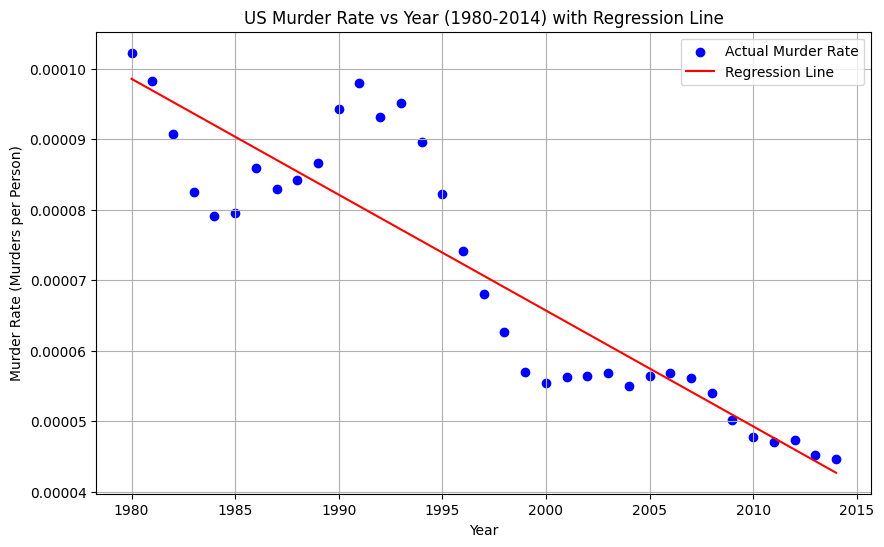

In [46]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


#load in crime rate dataset from Github raw url
url = 'https://raw.githubusercontent.com/AJ-4-beep/MAT-421/refs/heads/main/US_Crime_Rates_1960_2014.csv'
df = pd.read_csv(url)


# only  keep necessary columns
df = df[['Year', 'Population', 'Murder']]

# filter to only include years after 1979
df = df[df['Year'] >= 1980]

# create murder rate column by dividing gross murder by population (for year)
df['Murder_Rate'] = df['Murder'] / df['Population']





# Interpolation to ascertain linearity of data

# take only endpoints of 1980 and 2014
df_endpoints = df[(df['Year'] == 1980) | (df['Year'] == 2014)]


# linear interpolate between endpoints
interp_func = interp1d(df_endpoints['Year'], df_endpoints['Murder_Rate'], kind='linear')


#fidn midpoint year (1997) and compare against calculated interpolation value
# for 1997
mid_year = (1980 + 2014) // 2  #1997
estimated_murder_rate = interp_func(mid_year) #lininterp at 1997
actual_murder_rate = df[df['Year'] == mid_year]['Murder_Rate'].values[0]
#get actual murder rate for the year matching to midyear (1997)


# calc simple error percent for actual and estimated
interp_error_percentage = abs(estimated_murder_rate - actual_murder_rate) / actual_murder_rate * 100

print(f"Estimated Murder Rate for {mid_year} (via endpoint interpolation): {estimated_murder_rate:.8f}")
print(f"Actual Murder Rate for {mid_year}: {actual_murder_rate:.8f}")
print(f"Absolute Error: {abs(estimated_murder_rate - actual_murder_rate):.8f}")
print(f"Error Percentage: {interp_error_percentage:.4f}%")






# linear regression

# create x and y for regression
x = df['Year'].values
y = df['Murder_Rate'].values


# fit x and y to line, find slope and intercept of regression line
coeffs = np.polyfit(x, y, 1)
slope, intercept = coeffs

print(f"\nRegression Line: Murder_Rate = {slope:.8e} * Year + {intercept:.8f}")


#calc predicted murder rate for 2015
year_predict = 2015
murder_rate_2015_predicted = slope * year_predict + intercept

print(f"\nPredicted Murder Rate for 2015: {murder_rate_2015_predicted:.8f}")

# Real 2015 data sourced from sources (detailed in project)
real_2015_murders = 15696
real_2015_population = 320090857
real_2015_murder_rate = real_2015_murders / real_2015_population


# calc simple error percent for actual and estimated murder rate
regression_error_percentage = abs(murder_rate_2015_predicted - real_2015_murder_rate) / real_2015_murder_rate * 100


#calc estimtaed gross murders in 2015
predicted_murders_2015 = murder_rate_2015_predicted * real_2015_population

#difference between gross estimated and actual murders to see
#how many "excess" or "lack thereof" of murders in 2015
murder_difference = predicted_murders_2015 - real_2015_murders

#the same calc for gross difference in murders, butfor 2024
year_predict_2024 = 2024
murder_rate_2024_predicted = slope * year_predict_2024 + intercept
predicted_murders_2024 = murder_rate_2024_predicted * 340100000
real_2024_murders = 24849

#gross diff in 2024 estimated and actual murders
murder_difference_2024 = predicted_murders_2024 - real_2024_murders



print(f"Actual Murder Rate for 2015: {real_2015_murder_rate:.8f}")
print(f"Absolute Error for 2015 Prediction (Rate): {abs(murder_rate_2015_predicted - real_2015_murder_rate):.8f}")
print(f"Error Percentage for 2015 Prediction (Rate): {regression_error_percentage:.4f}%")

print(f"\nPredicted Total Murders in 2015: {predicted_murders_2015:.2f}")
print(f"Actual Total Murders in 2015: {real_2015_murders}")
print(f"Difference in Number of Murders: {murder_difference:.2f}")

print(f"\nPredicted Total Murders in 2024: {predicted_murders_2024:.2f}")
print(f"Actual Total Murders in 2024: {real_2024_murders}")
print(f"Difference in Number of Murders (2024): {murder_difference_2024:.2f}")


#plot with regression line

plt.figure(figsize=(10,6))
plt.scatter(df['Year'], df['Murder_Rate'], color='blue', label='Actual Murder Rate')
plt.plot(x, slope*x + intercept, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Murder Rate (Murders per Person)')
plt.title('US Murder Rate vs Year (1980-2014) with Regression Line')
plt.legend()
plt.grid(True)
plt.show()
